The following line installs pyspedas in the current environment.  It is necessary for Google Colab.

In [1]:
!pip install pyspedas


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Basic PySPEDAS example: Import necessary modules, load THEMIS FGM data for probe THEMIS-A, for time range 2007-03-23 to 2007-03-24, print a list of tplot variables, and plot two of them.


08-Dec-23 10:54:49: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/tha/l2/fgm/2007/
08-Dec-23 10:54:50: File is current: themis_data/tha/l2/fgm/2007/tha_l2_fgm_20070323_v01.cdf


0 : tha_fgs_btotal
1 : tha_fgs_gse
2 : tha_fgs_gsm
3 : tha_fgs_dsl
4 : tha_fgl_btotal
5 : tha_fgl_gse
6 : tha_fgl_gsm
7 : tha_fgl_dsl
8 : tha_fgl_ssl
9 : tha_fgh_btotal
10 : tha_fgh_gse
11 : tha_fgh_gsm
12 : tha_fgh_dsl
13 : tha_fgh_ssl
14 : tha_fge_btotal
15 : tha_fge_gse
16 : tha_fge_gsm
17 : tha_fge_dsl
18 : tha_fge_ssl


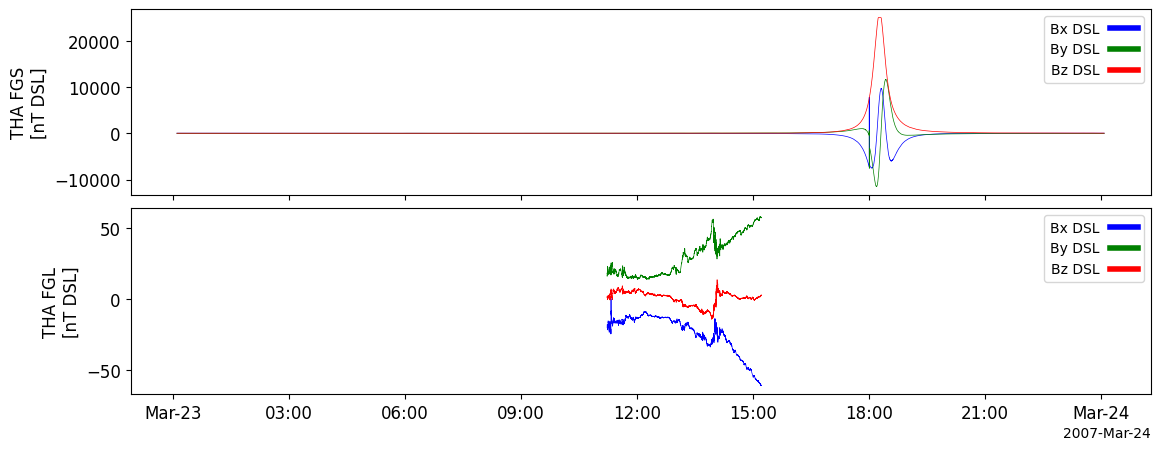

In [2]:
import pyspedas
from pytplot import tplot_names, get_data, tplot

pyspedas.themis.fgm(trange=['2007-03-23','2007-03-24'], probe='a')
tplot_names()
tplot(['tha_fgs_dsl', 'tha_fgl_dsl'])


Examine the data and metadata for one of the tplot variables just loaded

In [3]:
data_arrays = get_data('tha_fgs_dsl')
print("Structure returned by get_data()", data_arrays)
data_times=data_arrays.times
data_vals=data_arrays.y
print("Data times",data_times)
print("Data values",data_vals)

Structure returned by get_data() variable(times=array([1.17460840e+09, 1.17460840e+09, 1.17460840e+09, ...,
       1.17469467e+09, 1.17469467e+09, 1.17469467e+09]), y=array([[ 16.50905  ,  -8.597386 ,  14.1494465],
       [ 16.497149 ,  -8.618044 ,  14.173288 ],
       [ 16.53812  ,  -8.73796  ,  14.173288 ],
       ...,
       [ 17.318203 , -39.47606  ,  31.072771 ],
       [ 18.690683 , -39.38634  ,  30.977404 ],
       [ 18.59546  , -39.551605 ,  31.764185 ]], dtype=float32), v=array([1, 2, 3], dtype=int32))
Data times [1.17460840e+09 1.17460840e+09 1.17460840e+09 ... 1.17469467e+09
 1.17469467e+09 1.17469467e+09]
Data values [[ 16.50905    -8.597386   14.1494465]
 [ 16.497149   -8.618044   14.173288 ]
 [ 16.53812    -8.73796    14.173288 ]
 ...
 [ 17.318203  -39.47606    31.072771 ]
 [ 18.690683  -39.38634    30.977404 ]
 [ 18.59546   -39.551605   31.764185 ]]


Extract the metadata from the same tplot variable

In [4]:
md=get_data('tha_fgs_dsl',metadata=True)
print("Metadata structure:")
print(md)
print("")
print("Metadata CDF.LABELS entries:", md["CDF"]["LABELS"])
print("")
print("Metadata data_att entries:", md["data_att"])
print("")
print("Metadata plot_options entries:",md["plot_options"])


Metadata structure:
{'CDF': {'VATT': {'CATDESC': 'FGS magnetic field B in XYZ DSL (Despun Spacecraft) Coordinates ', 'DISPLAY_TYPE': 'time_series', 'FIELDNAM': 'BXYZ Despun Spacecraft Coordinate, nT units', 'FILLVAL': -1e+30, 'FORMAT': 'E13.6', 'DEPEND_TIME': 'tha_fgs_time', 'DEPEND_EPOCH0': 'tha_fgs_epoch0', 'DEPEND_0': 'tha_fgs_epoch', 'VALIDMIN': array([-25000., -25000., -25000.], dtype=float32), 'VALIDMAX': array([25000., 25000., 25000.], dtype=float32), 'VAR_TYPE': 'data', 'TENSOR_ORDER': '1', 'PROPERTY': 'vector', 'SC_ID': 'a', 'UNITS': 'nT DSL', 'VAR_NOTES': 'Units are in nanotesla', 'AVG_TYPE': 'standard', 'CALIB_SOFTWARE': 'fgm_calibrate, thm_cal_fgm, thm_cal_fit', 'CALIB_INPUT': 'tha_fgmcal.txt', 'SCALE_TYP': 'linear', 'DICT_KEY': 'magnetic_field>vector_DSL', 'SI_CONVERSION': '1e-9>T', 'LABL_PTR_1': 'tha_fgs_labl', 'DEPEND_1': 'tha_fgs_compno', 'COORDINATE_SYSTEM': 'DSL>Despun Spacecraft', 'REPRESENTATION_1': 'Rep_xyz', 'LABEL_1': 'tha_fgs_labl'}, 'GATT': {'Project': 'THEMIS'

Load and plot MMS FGM data

08-Dec-23 10:54:54: Loading pydata/mms1/fgm/srvy/l2/2015/10/mms1_fgm_srvy_l2_20151016_v4.18.0.cdf
08-Dec-23 10:54:54: Loading pydata/mms2/fgm/srvy/l2/2015/10/mms2_fgm_srvy_l2_20151016_v4.18.0.cdf
08-Dec-23 10:55:02: Loaded variables:
08-Dec-23 10:55:02: Epoch
08-Dec-23 10:55:02: mms1_fgm_b_gse_srvy_l2
08-Dec-23 10:55:02: mms1_fgm_b_gsm_srvy_l2
08-Dec-23 10:55:02: mms1_fgm_b_dmpa_srvy_l2
08-Dec-23 10:55:02: mms1_fgm_b_bcs_srvy_l2
08-Dec-23 10:55:02: mms1_fgm_flag_srvy_l2
08-Dec-23 10:55:02: Epoch_state
08-Dec-23 10:55:02: mms1_fgm_hirange_srvy_l2
08-Dec-23 10:55:02: mms1_fgm_bdeltahalf_srvy_l2
08-Dec-23 10:55:02: mms1_fgm_stemp_srvy_l2
08-Dec-23 10:55:02: mms1_fgm_etemp_srvy_l2
08-Dec-23 10:55:02: mms1_fgm_mode_srvy_l2
08-Dec-23 10:55:02: mms2_fgm_b_gse_srvy_l2
08-Dec-23 10:55:02: mms2_fgm_b_gsm_srvy_l2
08-Dec-23 10:55:02: mms2_fgm_b_dmpa_srvy_l2
08-Dec-23 10:55:02: mms2_fgm_b_bcs_srvy_l2
08-Dec-23 10:55:02: mms2_fgm_flag_srvy_l2
08-Dec-23 10:55:02: mms2_fgm_hirange_srvy_l2
08-Dec-23 10

['Epoch', 'mms1_fgm_b_gse_srvy_l2', 'mms1_fgm_b_gsm_srvy_l2', 'mms1_fgm_b_dmpa_srvy_l2', 'mms1_fgm_b_bcs_srvy_l2', 'mms1_fgm_flag_srvy_l2', 'Epoch_state', 'mms1_fgm_hirange_srvy_l2', 'mms1_fgm_bdeltahalf_srvy_l2', 'mms1_fgm_stemp_srvy_l2', 'mms1_fgm_etemp_srvy_l2', 'mms1_fgm_mode_srvy_l2', 'mms2_fgm_b_gse_srvy_l2', 'mms2_fgm_b_gsm_srvy_l2', 'mms2_fgm_b_dmpa_srvy_l2', 'mms2_fgm_b_bcs_srvy_l2', 'mms2_fgm_flag_srvy_l2', 'mms2_fgm_hirange_srvy_l2', 'mms2_fgm_bdeltahalf_srvy_l2', 'mms2_fgm_stemp_srvy_l2', 'mms2_fgm_etemp_srvy_l2', 'mms2_fgm_mode_srvy_l2', 'mms1_fgm_b_dmpa_srvy_l2_bvec', 'mms1_fgm_b_dmpa_srvy_l2_btot', 'mms1_fgm_b_gse_srvy_l2_bvec', 'mms1_fgm_b_gse_srvy_l2_btot', 'mms1_fgm_b_gsm_srvy_l2_bvec', 'mms1_fgm_b_gsm_srvy_l2_btot', 'mms1_fgm_b_bcs_srvy_l2_bvec', 'mms1_fgm_b_bcs_srvy_l2_btot', 'mms2_fgm_b_dmpa_srvy_l2_bvec', 'mms2_fgm_b_dmpa_srvy_l2_btot', 'mms2_fgm_b_gse_srvy_l2_bvec', 'mms2_fgm_b_gse_srvy_l2_btot', 'mms2_fgm_b_gsm_srvy_l2_bvec', 'mms2_fgm_b_gsm_srvy_l2_btot', 'mms2

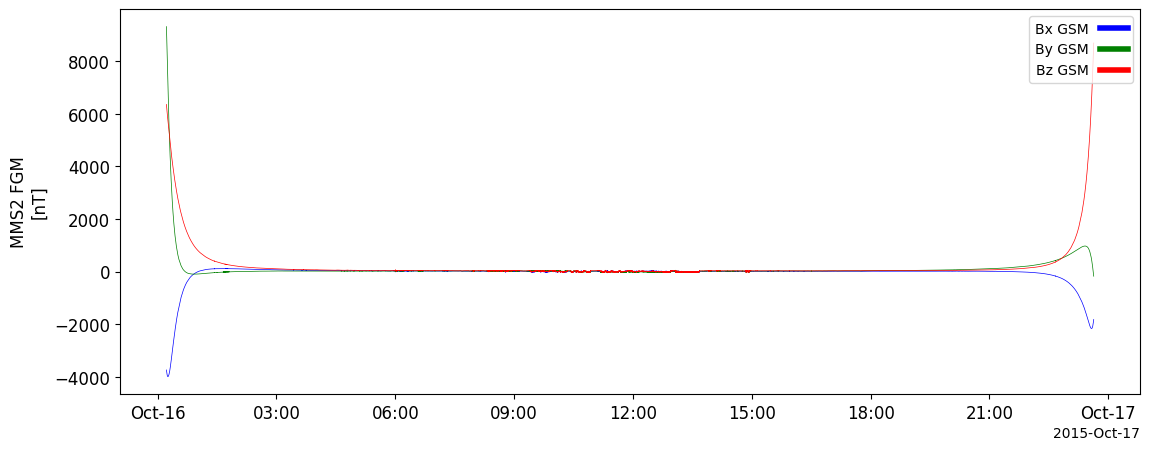

In [5]:
mms_tplot_vars = pyspedas.mms.fgm(probe=[1,2],trange=['2015-10-16','2015-10-17'])
print(mms_tplot_vars)
tplot('mms2_fgm_b_gsm_srvy_l2_bvec')

Load and plot MMS FEEPS spectrogram data

08-Dec-23 10:55:04: Loading pydata/mms1/feeps/srvy/l2/electron/2015/10/mms1_feeps_srvy_l2_electron_20151016000000_v7.1.2.cdf
08-Dec-23 10:55:05: mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_1: lengths of x (20764) and y (16) do not match!
08-Dec-23 10:55:05: mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_1 is currently not in pytplot.
08-Dec-23 10:55:05: mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_1 is currently not in pytplot.
08-Dec-23 10:55:05: mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_1 is currently not in pytplot.
08-Dec-23 10:55:05: mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_2: lengths of x (20764) and y (16) do not match!
08-Dec-23 10:55:05: mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_2 is currently not in pytplot.
08-Dec-23 10:55:05: mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_2 is currently not in pytplot.
08-Dec-23 10:55:05: mms1_epd_feeps_srvy_l2_electron_top

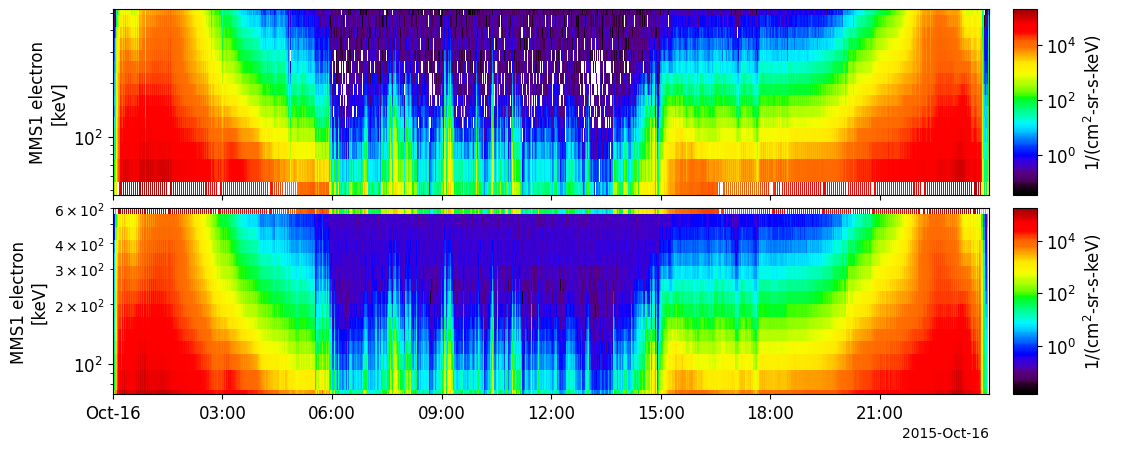

In [6]:
pyspedas.mms.feeps(probe='1', trange=['2015-10-16','2015-10-17'],datatype='electron')
tplot(['mms1_epd_feeps_srvy_l2_electron_intensity_omni','mms1_epd_feeps_srvy_l2_electron_intensity_omni_spin'])

Perform some coordinate transforms on previously loaded THEMIS FGM data

08-Dec-23 10:55:15: File is current: themis_data/tha/l1/state/2007/tha_l1_state_20070323.cdf
08-Dec-23 10:55:16: Creating spin model for probe a correction level 0
08-Dec-23 10:55:16: FGM correction variables not available
08-Dec-23 10:55:16: Skipping FGM corrections, do_fgm_corr False, correction_level = 0
08-Dec-23 10:55:16: Creating spin model for probe a correction level 1
08-Dec-23 10:55:16: FGM correction variables not available
08-Dec-23 10:55:16: Skipping FGM corrections, do_fgm_corr False, correction_level = 1
08-Dec-23 10:55:16: Creating spin model for probe a correction level 2
08-Dec-23 10:55:16: FGM correction variables not available
08-Dec-23 10:55:16: Skipping FGM corrections, do_fgm_corr False, correction_level = 2
08-Dec-23 10:55:16: tinterpol (linear) was applied to: tha_spinras_corrected_hires
08-Dec-23 10:55:16: tinterpol (linear) was applied to: tha_spindec_corrected_hires
08-Dec-23 10:55:16: Running transformation: subgei2gse
08-Dec-23 10:55:16: ['gse', 'gei']
08-

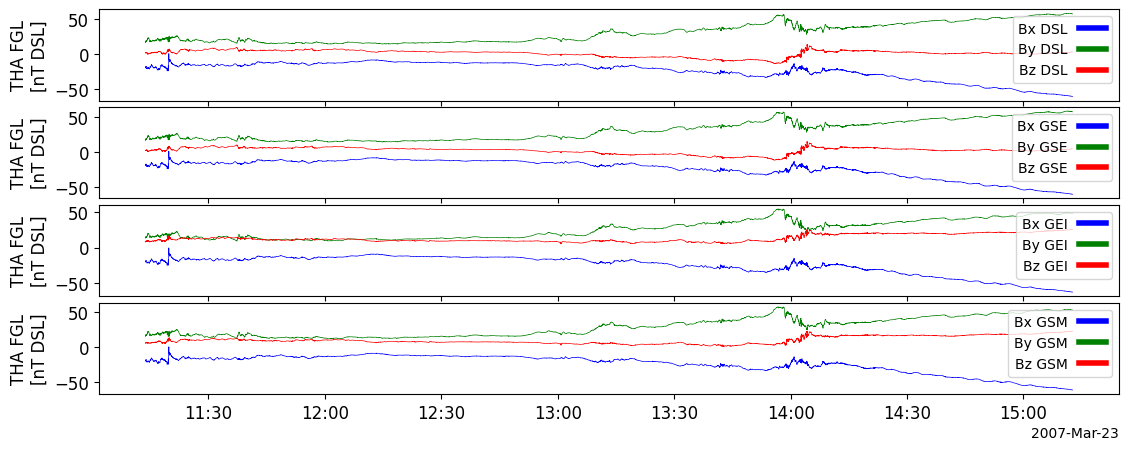

In [7]:
from pyspedas.themis.cotrans import dsl2gse

dsl2gse('tha_fgl_dsl',name_out='tha_fgl_gse')
pyspedas.cotrans('tha_fgl_gse',coord_out='GEI',name_out='tha_fgl_gei')
pyspedas.cotrans('tha_fgl_gse',coord_out='GSM',name_out='tha_fgl_gsm')
tplot(['tha_fgl_dsl','tha_fgl_gse','tha_fgl_gei','tha_fgl_gsm'])
